# Predicting Chronic Kidney Disease based on health records
The proposed health record of chronic kideny failure is taken from UCI Machine learning dataset.
It consists of 400 instances and 25 attributes
![![image.png](attachment:image.png)](http://)


## Summary of Results
The predictive analytics was done using various classifiers like  LogisticRegression
LinearDiscriminantAnalysis
KNeighborsClassifier
DecisionTreeClassifier
GaussianNB
SVM
RandomForestRegressor
XGBClassifier
GradientBoostingRegressor
AdaBoostRegressor
and the best classifier with high accuracy was evaluated
The sample size for the classifier is analysed using Learning curve

## Load Modules and helper functions

Time taken in reading the input files is 3.743171691894531e-05.
Number of rows in train dataset 400 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 2 to 399
Data columns (total 26 columns):
id       233 non-null int64
age      233 non-null float64
bp       233 non-null float64
sg       233 non-null float64
al       233 non-null float64
su       233 non-null float64
rbc      233 non-null float64
pc       233 non-null float64
pcc      233 non-null float64
ba       233 non-null float64
bgr      233 non-null float64
bu       233 non-null float64
sc       233 non-null float64
sod      233 non-null float64
pot      233 non-null float64
hemo     233 non-null float64
pcv      233 non-null float64
wc       233 non-null float64
rc       233 non-null float64
htn      233 non-null float64
dm       233 non-null float64
cad      233 non-null float64
appet    233 non-null float64
pe       233 non-null float64
ane      233 non-null float64
class    233 non-null float64
dtypes: float64(

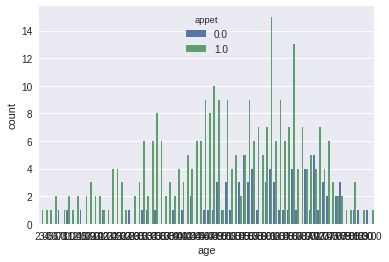

In [121]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import time
import spacy
from scipy.misc import imread
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
train_df = pd.read_csv('../input/kidney_disease.csv')
df = pd.read_csv('../input/kidney_disease.csv')
start_time = time.time()
end = time.time()
print("Time taken in reading the input files is {}.".format(end - start_time))
train_df.head()
print("Number of rows in train dataset {} ".format(train_df.shape[0]))

train_df.describe()

# Data Preprocessing

df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['classification'] = df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
df.rename(columns={'classification':'class'},inplace=True)
df['pe'] = df['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
df['appet'] = df['appet'].replace(to_replace='no',value=0)
df['cad'] = df['cad'].replace(to_replace='\tno',value=0)
df['dm'] = df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
#df.drop('id',axis=1,inplace=True)

from sklearn.model_selection import train_test_split
sns.countplot(x = 'age', hue = 'appet', data = df)
for i in ['rc','wc','pcv']:
    df[i] = df[i].str.extract('(\d+)').astype(float)
for i in ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','rc','wc','pcv']:
    df[i].fillna(df[i].mean(),inplace=True)
df = df.dropna(axis=0)
df['class'].value_counts()
df.head()
df.info()
values = df.values
#Data Augmentation
n_iterations = 10000
n_size = int(len(df) * 0.50)
print(n_size)
# run bootstrap
stats = list()
for i in range(n_iterations):
# prepare train and test sets
    train = resample(values, n_samples=n_size)
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
# fit model
model = DecisionTreeClassifier()
model.fit(train[:,:-1], train[:,-1])
# evaluate model
predictions = model.predict(test[:,:-1])
score = accuracy_score(test[:,-1], predictions)



In [ ]:
plt.figure(figsize=(12,3))
features = train.columns.values.tolist()
importance = clf_best.feature_importances_.tolist()
feature_series = pd.Series(data=importance,index=features)
feature_series.plot.bar()
plt.title('Feature Importance')

Time taken in reading the input files is 3.3855438232421875e-05.
Number of rows in train dataset 400 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 2 to 399
Data columns (total 26 columns):
id       233 non-null int64
age      233 non-null float64
bp       233 non-null float64
sg       233 non-null float64
al       233 non-null float64
su       233 non-null float64
rbc      233 non-null float64
pc       233 non-null float64
pcc      233 non-null float64
ba       233 non-null float64
bgr      233 non-null float64
bu       233 non-null float64
sc       233 non-null float64
sod      233 non-null float64
pot      233 non-null float64
hemo     233 non-null float64
pcv      233 non-null float64
wc       233 non-null float64
rc       233 non-null float64
htn      233 non-null float64
dm       233 non-null float64
cad      233 non-null float64
appet    233 non-null float64
pe       233 non-null float64
ane      233 non-null float64
class    233 non-null float64
dtypes: float64

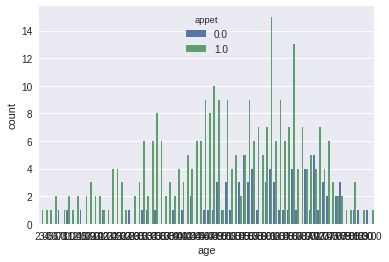

In [122]:
#another algorithm compile 2 and 3 below
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import time
import spacy
from scipy.misc import imread
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
train_df = pd.read_csv('../input/kidney_disease.csv')
df = pd.read_csv('../input/kidney_disease.csv')
start_time = time.time()
end = time.time()
print("Time taken in reading the input files is {}.".format(end - start_time))
train_df.head()
print("Number of rows in train dataset {} ".format(train_df.shape[0]))

train_df.describe()

# Data Preprocessing

df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['classification'] = df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
df.rename(columns={'classification':'class'},inplace=True)
df['pe'] = df['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
df['appet'] = df['appet'].replace(to_replace='no',value=0)
df['cad'] = df['cad'].replace(to_replace='\tno',value=0)
df['dm'] = df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
#df.drop('id',axis=1,inplace=True)

from sklearn.model_selection import train_test_split
sns.countplot(x = 'age', hue = 'appet', data = df)
for i in ['rc','wc','pcv']:
    df[i] = df[i].str.extract('(\d+)').astype(float)
for i in ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','rc','wc','pcv']:
    df[i].fillna(df[i].mean(),inplace=True)
df = df.dropna(axis=0)
df['class'].value_counts()
df.head()
df.info()
values = df.values


In [123]:
#Run this next to first for MLP
#Binary Classifier
# Import libraries for data wrangling, preprocessing and visualization
import numpy 
#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Select the columns to use for prediction in the neural network
prediction_var = ['sg','al','su','bgr','sc','pot','pcv','wc','rc','dm']
X = df[prediction_var].values
Y = df['class'].values
# Diagnosis values are strings. Changing them into numerical values using LabelEncoder.
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# Baseline model for the neural network. We choose a hidden layer of 10 neurons. The lesser number of neurons helps to eliminate the redundancies in the data and select the more important features.
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model. We use the the logarithmic loss function, and the Adam gradient optimizer.
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# Evaluate model using standardized dataset. 
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Results:%.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results:98.30% (3.41%)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
train_sizes = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
prediction_var = ['sg','al','su','bgr','sc','pot','pcv','wc','rc','dm']
X = df[prediction_var].values
y = df['class'].values
train_sizes, train_scores, validation_scores = learning_curve(estimator = LinearRegression(),X=X,y=y,train_sizes = train_sizes,cv = 5,scoring = 'neg_mean_squared_error')
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.0,1)

Time taken in reading the input files is 2.8133392333984375e-05.
Number of rows in train dataset 400 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 2 to 399
Data columns (total 26 columns):
id       233 non-null int64
age      233 non-null float64
bp       233 non-null float64
sg       233 non-null float64
al       233 non-null float64
su       233 non-null float64
rbc      233 non-null float64
pc       233 non-null float64
pcc      233 non-null float64
ba       233 non-null float64
bgr      233 non-null float64
bu       233 non-null float64
sc       233 non-null float64
sod      233 non-null float64
pot      233 non-null float64
hemo     233 non-null float64
pcv      233 non-null float64
wc       233 non-null float64
rc       233 non-null float64
htn      233 non-null float64
dm       233 non-null float64
cad      233 non-null float64
appet    233 non-null float64
pe       233 non-null float64
ane      233 non-null float64
class    233 non-null float64
dtypes: float64

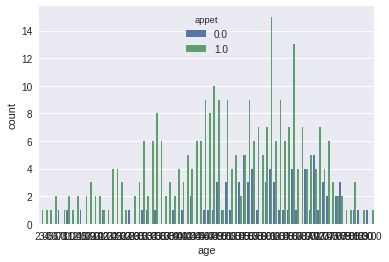

In [158]:
#Run this next to first for MLP
#Binary Classifier
# Import libraries for data wrangling, preprocessing and visualization
import numpy 
#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
# Read data file
df = pd.read_csv('../input/kidney_disease.csv')
start_time = time.time()
end = time.time()
print("Time taken in reading the input files is {}.".format(end - start_time))
train_df.head()
print("Number of rows in train dataset {} ".format(train_df.shape[0]))

train_df.describe()

# Data Preprocessing

df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['classification'] = df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
df.rename(columns={'classification':'class'},inplace=True)
df['pe'] = df['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
df['appet'] = df['appet'].replace(to_replace='no',value=0)
df['cad'] = df['cad'].replace(to_replace='\tno',value=0)
df['dm'] = df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
#df.drop('id',axis=1,inplace=True)

#from sklearn.model_selection import train_test_split
#sns.countplot(x = 'age', hue = 'appet', data = df)
for i in ['rc','wc','pcv']:
    df[i] = df[i].str.extract('(\d+)').astype(float)
for i in ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','rc','wc','pcv']:
    df[i].fillna(df[i].mean(),inplace=True)
df = df.dropna(axis=0)
df['class'].value_counts()
df.head()
df.info()
values = df.values
df = pd.read_csv('../input/kidney_disease.csv')
start_time = time.time()
end = time.time()
print("Time taken in reading the input files is {}.".format(end - start_time))
train_df.head()
print("Number of rows in train dataset {} ".format(train_df.shape[0]))

train_df.describe()

# Data Preprocessing

df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['classification'] = df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
df.rename(columns={'classification':'class'},inplace=True)
df['pe'] = df['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
df['appet'] = df['appet'].replace(to_replace='no',value=0)
df['cad'] = df['cad'].replace(to_replace='\tno',value=0)
df['dm'] = df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
#df.drop('id',axis=1,inplace=True)

from sklearn.model_selection import train_test_split
sns.countplot(x = 'age', hue = 'appet', data = df)
for i in ['rc','wc','pcv']:
    df[i] = df[i].str.extract('(\d+)').astype(float)
for i in ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','rc','wc','pcv']:
    df[i].fillna(df[i].mean(),inplace=True)
df = df.dropna(axis=0)
df['class'].value_counts()
df.head()
df.info()
values = df.values
#data = pd.read_csv('../input/kidney_disease.csv', header=0)
#seed = 5
#numpy.random.seed(seed)
# Column Unnamed : 32 holds only null values, so it is of no use to us. We simply drop that column.
#data.drop("Unnamed: 32",axis=1,inplace=True)
#data.drop("id", axis=1, inplace=True)
# Select the columns to use for prediction in the neural network
prediction_var = ['sg','al','su','bgr','sc','pot','pcv','wc','rc','dm']
X = df[prediction_var].values
Y = df['class'].values
# Diagnosis values are strings. Changing them into numerical values using LabelEncoder.
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# Baseline model for the neural network. We choose a hidden layer of 10 neurons. The lesser number of neurons helps to eliminate the redundancies in the data and select the more important features.
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model. We use the the logarithmic loss function, and the Adam gradient optimizer.
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# Evaluate model using standardized dataset. 
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Results:%.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet, LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# Modelling Helpers :
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score, ShuffleSplit, cross_validate

# Preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, Imputer, LabelEncoder

# Metrics :
# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report

print("Setup complete...")
labels = df.columns[:]
X = df[labels]
print(X)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#model = XGBClassifier()

#print("Accuracy: %.2f%%" % (accuracy * 100.0))
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestRegressor()))
models.append(('XGB', XGBClassifier()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('ABR', AdaBoostRegressor()))

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    print(name,accuracy)
    

In [ ]:
#print(score)
stats.append(score)
# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, numpy.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, numpy.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [ ]:
print(train)
print(test)


In [ ]:
print(train.shape)
print(test.shape)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
#loans = pd.read_csv('../lending-club-data.csv.zip')
#loans.iloc[0]
#loans.bad_loans.value_counts()
#loans = loans[~loans.payment_inc_ratio.isnull()]
#model_variables = ['grade', 'home_ownership','emp_length_num', 'sub_grade','short_emp',
          #  'dti', 'term', 'purpose', 'int_rate', 'last_delinq_none', 'last_major_derog_none',
           # 'revol_util', 'total_rec_late_fee', 'payment_inc_ratio', 'bad_loans']

#loans_data_relevent = loans[model_variables]
#loans_relevant_enconded = pd.get_dummies(loans_data_relevent)
#training_features, test_features, \
#training_target, test_target, = train_test_split(loans_relevant_enconded.drop(['bad_loans'], axis=1),
 #                                              loans_relevant_enconded['bad_loans'],
  #                                             test_size = .1,
   #                                            random_state=12)
sm = SMOTE(random_state=12, ratio = 1.0)
x_res, y_res = sm.fit_sample(training_features, training_target)
#print training_target.value_counts(), np.bincount(y_res)
x_train_res, x_val_res, y_train_res, y_val_res = train_test_split(x_res,
                                                    y_res,
                                                    test_size = .1,
                                                    random_state=12)


In [ ]:
#oversampling
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet, LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# Modelling Helpers :
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score, ShuffleSplit, cross_validate

# Preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, Imputer, LabelEncoder

# Metrics :
# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report

print("Setup complete...")


df = pd.read_csv('../input/kidney_disease.csv')

target_count = df.classification.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');
# Data Preprocessing

df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['classification'] = df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
df.rename(columns={'classification':'class'},inplace=True)
df['pe'] = df['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
df['appet'] = df['appet'].replace(to_replace='no',value=0)
df['cad'] = df['cad'].replace(to_replace='\tno',value=0)
df['dm'] = df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
#df.drop('id',axis=1,inplace=True)

from sklearn.model_selection import train_test_split
sns.countplot(x = 'age', hue = 'appet', data = df)
for i in ['rc','wc','pcv']:
    df[i] = df[i].str.extract('(\d+)').astype(float)
for i in ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','rc','wc','pcv']:
    df[i].fillna(df[i].mean(),inplace=True)
df = df.dropna(axis=0)
df['class'].value_counts()
df.head()
df.info()
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Remove 'id' and 'target' columns
labels = df.columns[1:]
print(labels)
X = df[labels]
print(X)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=1)
print("Training Dataset size:",X_train)
#model = XGBClassifier()
#model.fit(X_train, y_train)
#y_pred = model.predict(X_test)

#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestRegressor()))
models.append(('XGB', XGBClassifier()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('ABR', AdaBoostRegressor()))

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    print(name,accuracy)

In [ ]:
#run with feature which reduce the classifier performane
#model = XGBClassifier()
#model.fit(X_train[['age']], y_train)
#y_pred = model.predict(X_test[['age']])

#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
#count_class_0, count_class_1 = df.classification.value_counts()
count_class_0=target_count[0]
count_class_1=target_count[1]
df_class_0 = df[df['class'] == 0]
df_class_1 = df[df['class'] == 1]
print(df_class_1.count())
# Divide by class


In [ ]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
#print(df_class_1_over)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
print(df_test_over)
print(df_test_over[df_test_over['class'] == 0])
#print(df_test_over[df_test_over['class'] == 1])
print('Random over-sampling:')
#print(df_test_over.class.value())
#print(df.info())
#print(df_test_over.class.value_counts())

df_test_over['class'].value_counts().plot(kind='bar', title='Count (target)');

In [159]:
import warnings
warnings.filterwarnings("ignore")

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet, LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# Modelling Helpers :
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score, ShuffleSplit, cross_validate

# Preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, Imputer, LabelEncoder

# Metrics :
# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report

print("Setup complete...")
method_names = []
method_scores = []
labels = df.columns[:]
X = df[labels]
print(X)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#model = XGBClassifier()

#print("Accuracy: %.2f%%" % (accuracy * 100.0))
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestRegressor()))
models.append(('XGB', XGBClassifier()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('ABR', AdaBoostRegressor()))

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    print(name,accuracy)
    method_names.append(name)
    method_scores.append(accuracy)
    
    #print(name,accuracy_score(y_test, pred))
    
   # model.fit(X_train, y_train)
    #if model='XGB':
        #big_X = x_train[feature_columns_to_use].append(x_train[feature_columns_to_use])
        #big_X_imputed = DataFrameImputer().fit_transform(big_X)
    #pred = model.predict(y_test).astype(int)
    #print(name, accuracy_score(y_test, pred))

Setup complete...
      id        age          bp     sg   al  ...    cad  appet   pe  ane  class
2      2  62.000000   80.000000  1.010  2.0  ...    0.0    0.0  0.0  1.0    1.0
3      3  48.000000   70.000000  1.005  4.0  ...    0.0    0.0  1.0  1.0    1.0
4      4  51.000000   80.000000  1.010  2.0  ...    0.0    1.0  0.0  0.0    1.0
7      7  24.000000   76.469072  1.015  2.0  ...    0.0    1.0  1.0  0.0    1.0
8      8  52.000000  100.000000  1.015  3.0  ...    0.0    1.0  0.0  1.0    1.0
9      9  53.000000   90.000000  1.020  2.0  ...    0.0    0.0  0.0  1.0    1.0
11    11  63.000000   70.000000  1.010  3.0  ...    0.0    0.0  1.0  0.0    1.0
14    14  68.000000   80.000000  1.010  3.0  ...    1.0    0.0  1.0  0.0    1.0
20    20  61.000000   80.000000  1.015  2.0  ...    1.0    0.0  1.0  1.0    1.0
22    22  48.000000   80.000000  1.025  4.0  ...    0.0    1.0  0.0  1.0    1.0
24    24  42.000000  100.000000  1.015  4.0  ...    0.0    0.0  0.0  0.0    1.0
27    27  69.000000   

Text(0, 0.5, 'Method Accuracy')

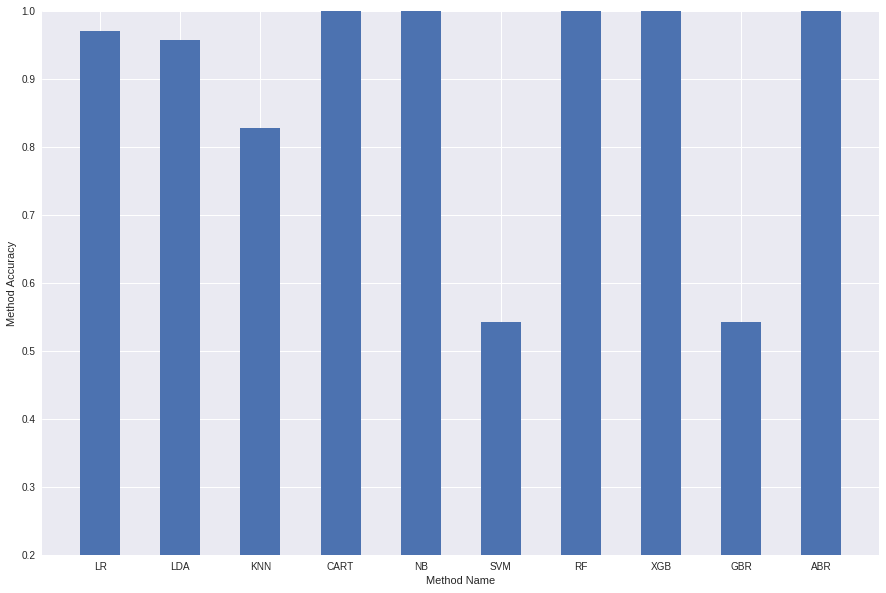

In [126]:
plt.figure(figsize=(15,10))
plt.ylim([0.20,1])
plt.bar(method_names,method_scores,width=0.5)
plt.xlabel('Method Name')
plt.ylabel('Method Accuracy')

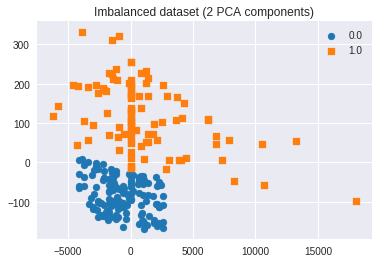

37 new random picked points


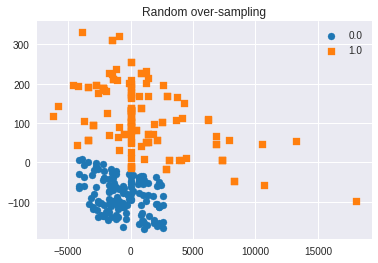

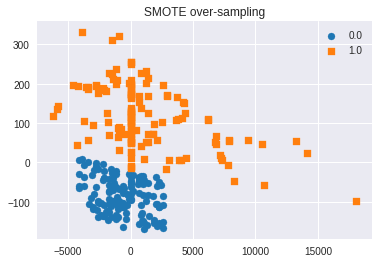

In [154]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

In [165]:
#RNN
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=26))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  
print(X_train.shape)
model.fit(X_train,y_train,verbose=1,shuffle=True, nb_epoch=3,batch_size=100,validation_split=0.4)

# Read test data and evaluate results


score = model.evaluate(X_test,y_test, batch_size=16)
print("LOSS")
print(score[0])
print("precision")
print(score[1])

(163, 26)
Train on 97 samples, validate on 66 samples
Epoch 1/3
97/97 [==============================] - 9s 90ms/step - loss: 8.8068 - acc: 0.4536 - val_loss: 7.3264 - val_acc: 0.5455
Epoch 2/3
97/97 [==============================] - 0s 158us/step - loss: 7.1451 - acc: 0.5567 - val_loss: 7.3264 - val_acc: 0.5455
Epoch 3/3
70/70 [==============================] - 0s 255us/step
LOSS
7.368272393090384
precision
0.542857141154153


In [166]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(5, input_dim=10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model. We use the the logarithmic loss function, and the Adam gradient optimizer.
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

ValueError: Error when checking input: expected dense_255_input to have shape (10,) but got array with shape (26,)

In [167]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=26, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=26, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=26, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=26, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

NameError: name 'GRU' is not defined

In [ ]:
# using a different dataset with 8000 records


In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

def auc_scorer(clf, X, y, model): # Helper function to plot the ROC curve
    if model=='RF':
        fpr, tpr, _ = roc_curve(y, clf.predict_proba(X)[:,1])
    elif model=='SVM':
        fpr, tpr, _ = roc_curve(y, clf.decision_function(X))
    roc_auc = auc(fpr, tpr)

    plt.figure()    # Plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve from '+model+' model (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr,roc_auc

# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

## Load files

In [129]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import time
import spacy
from scipy.misc import imread
train_df = pd.read_csv('../input/kidney_disease.csv')
df = pd.read_csv('../input/kidney_disease.csv')
start_time = time.time()
end = time.time()
print("Time taken in reading the input files is {}.".format(end - start_time))
train_df.head()
print("Number of rows in train dataset {} ".format(train_df.shape[0]))

train_df.describe()



Time taken in reading the input files is 2.6226043701171875e-05.
Number of rows in train dataset 400 


,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


## Cleaning and preprocessing of data for training a classifier

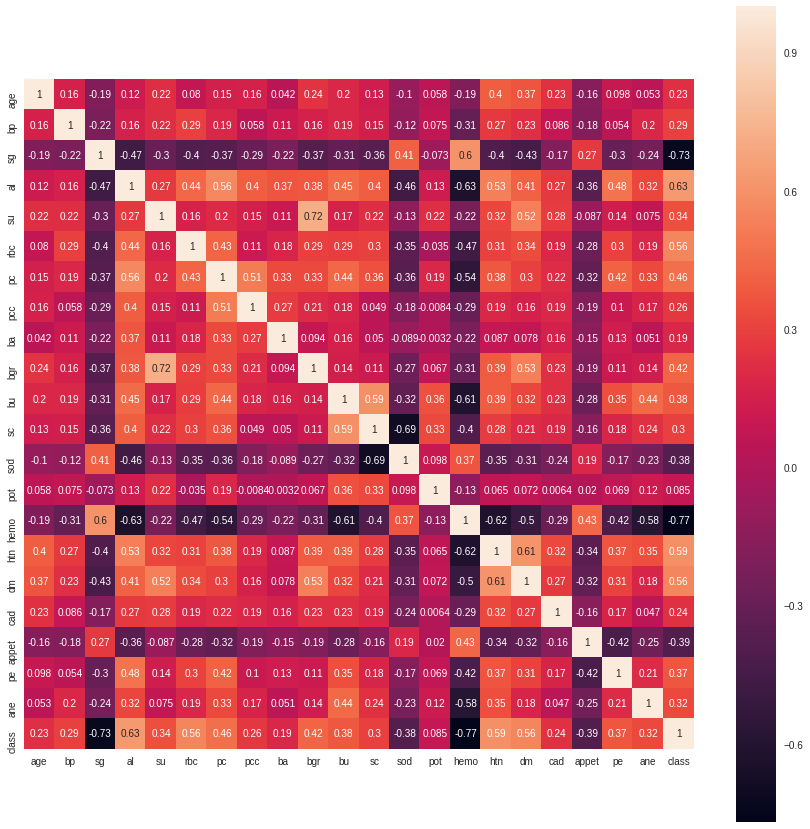

In [130]:
# Map text to 1/0 and do some cleaning
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['classification'] = df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
df.rename(columns={'classification':'class'},inplace=True)
df['pe'] = df['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
df['appet'] = df['appet'].replace(to_replace='no',value=0)
df['cad'] = df['cad'].replace(to_replace='\tno',value=0)
df['dm'] = df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
df.drop('id',axis=1,inplace=True)
corr = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)


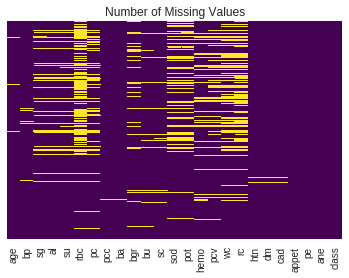

In [131]:
# Further cleaning
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.grid()
plt.title("Number of Missing Values")
plt.savefig('missing.png')


In [132]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age      391 non-null float64
bp       388 non-null float64
sg       353 non-null float64
al       354 non-null float64
su       351 non-null float64
rbc      248 non-null float64
pc       335 non-null float64
pcc      396 non-null float64
ba       396 non-null float64
bgr      356 non-null float64
bu       381 non-null float64
sc       383 non-null float64
sod      313 non-null float64
pot      312 non-null float64
hemo     348 non-null float64
pcv      330 non-null object
wc       295 non-null object
rc       270 non-null object
htn      398 non-null float64
dm       398 non-null float64
cad      398 non-null float64
appet    399 non-null float64
pe       399 non-null float64
ane      399 non-null float64
class    400 non-null float64
dtypes: float64(22), object(3)
memory usage: 78.2+ KB


## Check the portion of rows with NaN
- Now the data is cleaned with improper values labelled NaN. Let's see how many NaNs are there.
- Drop all the rows with NaN values, and build a model out of this dataset (i.e. df2)

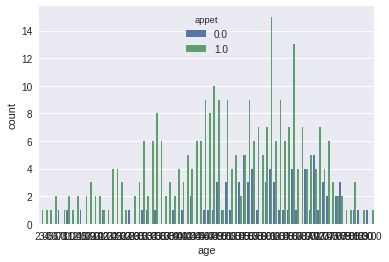

In [133]:
from sklearn.model_selection import train_test_split
sns.countplot(x = 'age', hue = 'appet', data = df)
for i in ['rc','wc','pcv']:
    df[i] = df[i].str.extract('(\d+)').astype(float)
for i in ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','rc','wc','pcv']:
    df[i].fillna(df[i].mean(),inplace=True)



In [134]:
df2 = df.dropna(axis=0)
df2['class'].value_counts()

0.0    135
1.0     98
Name: class, dtype: int64

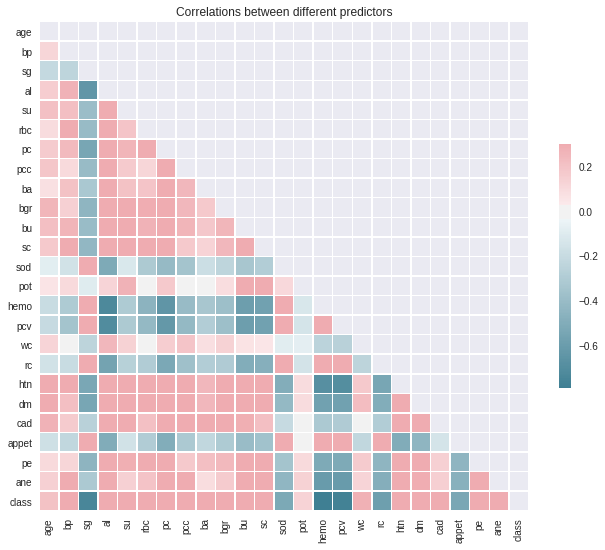

In [135]:
corr_df = df2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlations between different predictors')
plt.show()

In [136]:
x_train, x_test, y_train, y_test = train_test_split(df2.iloc[:,:-1], df2['class'], 
                                                    test_size = 0.50, random_state=44,
                                                   stratify= df2['class'] )
print(x_train.shape)
print(x_test.shape)
#df['rbc'] = pd.to_numeric(df['rbc'],errors='coerce')
#df['wc'] = pd.to_numeric(df['wc'],errors='coerce')
#df['pc'] = pd.to_numeric(df['pc'],errors='coerce')
#df['pcc'] = pd.to_numeric(df['pcc'],errors='coerce')
#df['ba'] = pd.to_numeric(df['ba'],errors='coerce')
#df['htn'] = pd.to_numeric(df['htn'],errors='coerce')
#df['pcv'] = pd.to_numeric(df['pcv'],errors='coerce')
#df['rc'] = pd.to_numeric(df['rc'],errors='coerce')
#df['cad'] = pd.to_numeric(df['cad'],errors='coerce')
#df['dm'] = pd.to_numeric(df['dm'],errors='coerce')
#df.dtypes
y_train.value_counts()


(116, 24)
(117, 24)


0.0    67
1.0    49
Name: class, dtype: int64

In [ ]:
#df2 = df.dropna(axis=0)
#no_na = df2.index.tolist()
#some_na = df.drop(no_na).apply(lambda x: pd.to_numeric(x,errors='coerce'))
#some_na = some_na.fillna(0) # Fill up all Nan by zero.

#x_test = some_na.iloc[:,:-1]
#y_test = some_na['class']
#y_true = y_test
#lr_pred = clf_best.predict(x_test)
#print(classification_report(y_true, lr_pred))

#confusion = confusion_matrix(y_test, lr_pred)
#print('Confusion Matrix:')
#print(confusion)

#print('Accuracy: %3f' % accuracy_score(y_true, lr_pred))
# Determine the false positive and true positive rates
#fpr,tpr,roc_auc = auc_scorer(clf_best, x_test, y_test, 'RF')

In [137]:
import xgboost as xgb
model = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree=0.3, learning_rate=0.1,max_depth=8, n_estimators=50)
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score

method_names = []
method_scores = []
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train) #Fitting
print("Logistic Regression Classification Test Accuracy {}".format(log_reg.score(x_test,y_test)))
method_names.append("Logistic Reg.")
method_scores.append(log_reg.score(x_test,y_test))

#Confusion Matrix
y_pred = log_reg.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score

dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train,y_train)
print("Decision Tree Classification Score: ",dec_tree.score(x_test,y_test))
method_names.append("Decision Tree")
method_scores.append(dec_tree.score(x_test,y_test))

#Confusion Matrix
y_pred = dec_tree.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
plt.ylim([0.85,1])
plt.bar(method_names,method_scores,width=0.5)
plt.xlabel('Method Name')
plt.ylabel('Method Score')

In [ ]:
tuned_parameters = [{'n_estimators':[7,8,9,10,11,12,13,14,15,16],'max_depth':[2,3,4,5,6,None],
                     'class_weight':[None,{0: 0.33,1:0.67},'balanced'],'random_state':[42]}]
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=10,scoring='f1')
clf.fit(x_train, y_train)


print("Detailed classification report:")
y_true, lr_pred = y_test, clf.predict(x_test)
print(classification_report(y_true, lr_pred))

confusion = confusion_matrix(y_test, lr_pred)
print('Confusion Matrix:')
print(confusion)

# Determine the false positive and true positive rates
#fpr,tpr,roc_auc = auc_scorer(clf, x_test, y_test, 'RF')

print('Best parameters:')
print(clf.best_params_)
clf_best = clf.best_estimator_


In [ ]:
plt.figure(figsize=(12,3))
features = x_test.columns.values.tolist()
importance = clf_best.feature_importances_.tolist()
feature_series = pd.Series(data=importance,index=features)
feature_series.plot.bar()
plt.title('Feature Importance')

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train) #Fitting
print("Logistic Regression Classification Test Accuracy {}".format(log_reg.score(x_test,y_test)))
method_names.append("Logistic Reg.")
method_scores.append(log_reg.score(x_test,y_test))

#Confusion Matrix
y_pred = log_reg.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet, LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# Modelling Helpers :
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score, ShuffleSplit, cross_validate

# Preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, Imputer, LabelEncoder

# Metrics :
# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report

print("Setup complete...")
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestRegressor()))
models.append(('XGB', XGBClassifier()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('ABR', AdaBoostRegressor()))

for name, model in models:
    model.fit(x_train, y_train)
    #if model='XGB':
        #big_X = x_train[feature_columns_to_use].append(x_train[feature_columns_to_use])
        #big_X_imputed = DataFrameImputer().fit_transform(big_X)
    pred = model.predict(x_test).astype(int)
    print(name, accuracy_score(y_test, pred))

In [ ]:
from sklearn.preprocessing import LabelEncoder

sns.heatmap(df.isnull(),cmap="viridis",cbar=False,yticklabels=False)
x_train, xtest, y_train, y_test = train_test_split(df.iloc[:,:-1], df['classification'], 
                                                    test_size = 0.33, random_state=44,
                                                   stratify= df['classification'] )




    

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title("Number of Missing Values")
plt.savefig('missing_updated.png')

## Examine correlations between different features

In [ ]:
from sklearn.preprocessing import LabelEncoder
import glob
import keras as k
import numpy as np
import pandas as pd
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt

#columns_to_retain = ["sg", "al", "sc", "hemo","pcv", "wbcc", "rbcc", "htn", "classification"]
#olumns_to_retain = df.columns
#df = df.drop([col for col in df.columns if not col in columns_to_retain], axis=1)
    # now drop the rows with na values
#df = df.dropna(axis=0)

#for column in df.columns:
   # if df[column].dtype == np.number:
   #     continue
    #df[column] = LabelEncoder().fit_transform(df[column])

#y = df.classification.values
#x = df.drop(["classification"],axis=1)
#from sklearn.preprocessing import LabelEncoder

#for i in ['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','classification']:
   # df[i] = df[i].map({'3+': 3})
 #   df[i] = LabelEncoder().fit_transform(df[i])

#df2 = df.dropna(axis=0)
#df2['class'].value_counts()
#x_train = df.drop(['id','classification'],axis=1)
#y_train = df['classification']
#x_train, x_test, y_train, y_test = train_test_split(df2.iloc[:,:-1], df2['classification'], 
 #                                                   test_size = 0.33, random_state=44,
  #                                                 stratify= df2['classification'] )
#x_scaler = MinMaxScaler()
#x_scaler.fit(x)
#column_names = x.columns
#x[column_names] = x_scaler.transform(x)

#x_train,  x_test, y_train, y_test = train_test_split(x, y, test_size=5, shuffle=True)

#optimizer = k.optimizers.Adam()
#checkpoint = ModelCheckpoint("ckd.best.model", monitor="loss",
                                # mode="min", save_best_only=True, verbose=0)
#model = k.models.Sequential()
#model.add(Dense(256, input_dim=len(x.columns),kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)




In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet, LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# Modelling Helpers :
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score, ShuffleSplit, cross_validate

# Preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, Imputer, LabelEncoder

# Metrics :
# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report

print("Setup complete...")
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestRegressor()))
models.append(('XGB', XGBClassifier()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('ABR', AdaBoostRegressor()))

for name, model in models:
    model.fit(x_train, y_train)
    pred = model.predict(x_test).astype(int)
    print(name, accuracy_score(y_test, pred))

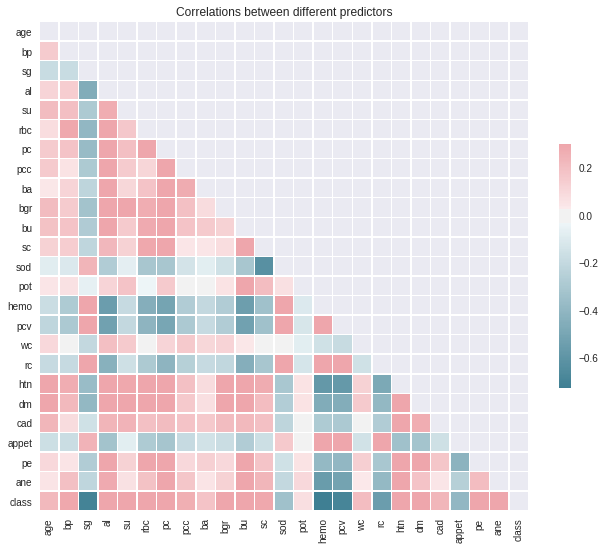

In [138]:

corr_df = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlations between different predictors')
plt.show()

In [139]:
svc = SVC()

params = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

clf = GridSearchCV(svc, param_grid = params, scoring = 'accuracy', cv = 10, verbose = 2)

clf.fit(x_train, y_train)
clf.best_params_
model = Sequential()
model.add(Dense(100,input_dim=X.shape[1],activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X,Y,epochs=100,batch_size=40,validation_split=.2,verbose=2)
model.summary()

Fitting 10 folds for each of 128 candidates, totalling 1280 fits
[CV] C=0.1, gamma=0.1, kernel=linear .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=  14.5s
[CV] C=0.1, gamma=0.1, kernel=linear .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.5s remaining:    0.0s


[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   4.3s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   4.3s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.9s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   1.3s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .

[CV] .................... C=0.1, gamma=1, kernel=linear, total=  14.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   4.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   4.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.9s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   1.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[CV] .................. C=0.1, gamma=1.3, kernel=linear, total=  14.5s
[CV] C=0.1, gamma=1.3, kernel=linear .................................
[CV] .................. C=0.1, gamma=1.3, kernel=linear, total=   4.3s
[CV] C=0.1, gamma=1.3, kernel=linear .................................
[CV] .................. C=0.1, gamma=1.3, kernel=linear, total=   4.4s
[CV] C=0.1, gamma=1.3, kernel=linear .................................
[CV] .................. C=0.1, gamma=1.3, kernel=linear, total=   0.9s
[CV] C=0.1, gamma=1.3, kernel=linear .................................
[CV] .................. C=0.1, gamma=1.3, kernel=linear, total=   0.4s
[CV] C=0.1, gamma=1.3, kernel=linear .................................
[CV] .................. C=0.1, gamma=1.3, kernel=linear, total=   1.3s
[CV] C=0.1, gamma=1.3, kernel=linear .................................
[CV] .................. C=0.1, gamma=1.3, kernel=linear, total=   0.3s
[CV] C=0.1, gamma=1.3, kernel=linear .................................
[CV] .

[CV] .................. C=0.8, gamma=0.8, kernel=linear, total=  14.5s
[CV] C=0.8, gamma=0.8, kernel=linear .................................
[CV] .................. C=0.8, gamma=0.8, kernel=linear, total=   3.2s
[CV] C=0.8, gamma=0.8, kernel=linear .................................
[CV] .................. C=0.8, gamma=0.8, kernel=linear, total=   3.1s
[CV] C=0.8, gamma=0.8, kernel=linear .................................
[CV] .................. C=0.8, gamma=0.8, kernel=linear, total=   0.9s
[CV] C=0.8, gamma=0.8, kernel=linear .................................
[CV] .................. C=0.8, gamma=0.8, kernel=linear, total=   0.4s
[CV] C=0.8, gamma=0.8, kernel=linear .................................
[CV] .................. C=0.8, gamma=0.8, kernel=linear, total=   1.3s
[CV] C=0.8, gamma=0.8, kernel=linear .................................
[CV] .................. C=0.8, gamma=0.8, kernel=linear, total=   0.2s
[CV] C=0.8, gamma=0.8, kernel=linear .................................
[CV] .

[CV] .................. C=0.8, gamma=1.1, kernel=linear, total=  14.8s
[CV] C=0.8, gamma=1.1, kernel=linear .................................
[CV] .................. C=0.8, gamma=1.1, kernel=linear, total=   3.0s
[CV] C=0.8, gamma=1.1, kernel=linear .................................
[CV] .................. C=0.8, gamma=1.1, kernel=linear, total=   3.1s
[CV] C=0.8, gamma=1.1, kernel=linear .................................
[CV] .................. C=0.8, gamma=1.1, kernel=linear, total=   0.9s
[CV] C=0.8, gamma=1.1, kernel=linear .................................
[CV] .................. C=0.8, gamma=1.1, kernel=linear, total=   0.4s
[CV] C=0.8, gamma=1.1, kernel=linear .................................
[CV] .................. C=0.8, gamma=1.1, kernel=linear, total=   1.3s
[CV] C=0.8, gamma=1.1, kernel=linear .................................
[CV] .................. C=0.8, gamma=1.1, kernel=linear, total=   0.2s
[CV] C=0.8, gamma=1.1, kernel=linear .................................
[CV] .

[CV] .................. C=0.8, gamma=1.4, kernel=linear, total=  14.3s
[CV] C=0.8, gamma=1.4, kernel=linear .................................
[CV] .................. C=0.8, gamma=1.4, kernel=linear, total=   3.0s
[CV] C=0.8, gamma=1.4, kernel=linear .................................
[CV] .................. C=0.8, gamma=1.4, kernel=linear, total=   3.2s
[CV] C=0.8, gamma=1.4, kernel=linear .................................
[CV] .................. C=0.8, gamma=1.4, kernel=linear, total=   0.9s
[CV] C=0.8, gamma=1.4, kernel=linear .................................
[CV] .................. C=0.8, gamma=1.4, kernel=linear, total=   0.4s
[CV] C=0.8, gamma=1.4, kernel=linear .................................
[CV] .................. C=0.8, gamma=1.4, kernel=linear, total=   1.3s
[CV] C=0.8, gamma=1.4, kernel=linear .................................
[CV] .................. C=0.8, gamma=1.4, kernel=linear, total=   0.2s
[CV] C=0.8, gamma=1.4, kernel=linear .................................
[CV] .

[CV] .................. C=0.9, gamma=0.9, kernel=linear, total=  14.3s
[CV] C=0.9, gamma=0.9, kernel=linear .................................
[CV] .................. C=0.9, gamma=0.9, kernel=linear, total=   3.0s
[CV] C=0.9, gamma=0.9, kernel=linear .................................
[CV] .................. C=0.9, gamma=0.9, kernel=linear, total=   3.1s
[CV] C=0.9, gamma=0.9, kernel=linear .................................
[CV] .................. C=0.9, gamma=0.9, kernel=linear, total=   0.9s
[CV] C=0.9, gamma=0.9, kernel=linear .................................
[CV] .................. C=0.9, gamma=0.9, kernel=linear, total=   0.4s
[CV] C=0.9, gamma=0.9, kernel=linear .................................
[CV] .................. C=0.9, gamma=0.9, kernel=linear, total=   1.3s
[CV] C=0.9, gamma=0.9, kernel=linear .................................
[CV] .................. C=0.9, gamma=0.9, kernel=linear, total=   0.2s
[CV] C=0.9, gamma=0.9, kernel=linear .................................
[CV] .

[CV] .................. C=0.9, gamma=1.2, kernel=linear, total=  14.3s
[CV] C=0.9, gamma=1.2, kernel=linear .................................
[CV] .................. C=0.9, gamma=1.2, kernel=linear, total=   3.0s
[CV] C=0.9, gamma=1.2, kernel=linear .................................
[CV] .................. C=0.9, gamma=1.2, kernel=linear, total=   3.1s
[CV] C=0.9, gamma=1.2, kernel=linear .................................
[CV] .................. C=0.9, gamma=1.2, kernel=linear, total=   0.9s
[CV] C=0.9, gamma=1.2, kernel=linear .................................
[CV] .................. C=0.9, gamma=1.2, kernel=linear, total=   0.4s
[CV] C=0.9, gamma=1.2, kernel=linear .................................
[CV] .................. C=0.9, gamma=1.2, kernel=linear, total=   1.3s
[CV] C=0.9, gamma=1.2, kernel=linear .................................
[CV] .................. C=0.9, gamma=1.2, kernel=linear, total=   0.2s
[CV] C=0.9, gamma=1.2, kernel=linear .................................
[CV] .

[CV] .................... C=1, gamma=0.1, kernel=linear, total=  14.7s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   3.1s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   3.1s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.9s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.4s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   1.3s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.2s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .

[CV] ...................... C=1, gamma=1, kernel=linear, total=  14.2s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   3.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   3.1s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.9s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.4s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   1.3s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.2s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] .

[CV] .................... C=1, gamma=1.3, kernel=linear, total=  14.2s
[CV] C=1, gamma=1.3, kernel=linear ...................................
[CV] .................... C=1, gamma=1.3, kernel=linear, total=   3.0s
[CV] C=1, gamma=1.3, kernel=linear ...................................
[CV] .................... C=1, gamma=1.3, kernel=linear, total=   3.1s
[CV] C=1, gamma=1.3, kernel=linear ...................................
[CV] .................... C=1, gamma=1.3, kernel=linear, total=   0.9s
[CV] C=1, gamma=1.3, kernel=linear ...................................
[CV] .................... C=1, gamma=1.3, kernel=linear, total=   0.4s
[CV] C=1, gamma=1.3, kernel=linear ...................................
[CV] .................... C=1, gamma=1.3, kernel=linear, total=   1.3s
[CV] C=1, gamma=1.3, kernel=linear ...................................
[CV] .................... C=1, gamma=1.3, kernel=linear, total=   0.2s
[CV] C=1, gamma=1.3, kernel=linear ...................................
[CV] .

[CV] .................. C=1.1, gamma=0.8, kernel=linear, total=  14.3s
[CV] C=1.1, gamma=0.8, kernel=linear .................................
[CV] .................. C=1.1, gamma=0.8, kernel=linear, total=   3.0s
[CV] C=1.1, gamma=0.8, kernel=linear .................................
[CV] .................. C=1.1, gamma=0.8, kernel=linear, total=   3.1s
[CV] C=1.1, gamma=0.8, kernel=linear .................................
[CV] .................. C=1.1, gamma=0.8, kernel=linear, total=   1.0s
[CV] C=1.1, gamma=0.8, kernel=linear .................................
[CV] .................. C=1.1, gamma=0.8, kernel=linear, total=   0.4s
[CV] C=1.1, gamma=0.8, kernel=linear .................................
[CV] .................. C=1.1, gamma=0.8, kernel=linear, total=   1.3s
[CV] C=1.1, gamma=0.8, kernel=linear .................................
[CV] .................. C=1.1, gamma=0.8, kernel=linear, total=   0.2s
[CV] C=1.1, gamma=0.8, kernel=linear .................................
[CV] .

[CV] .................. C=1.1, gamma=1.1, kernel=linear, total=  14.3s
[CV] C=1.1, gamma=1.1, kernel=linear .................................
[CV] .................. C=1.1, gamma=1.1, kernel=linear, total=   3.1s
[CV] C=1.1, gamma=1.1, kernel=linear .................................
[CV] .................. C=1.1, gamma=1.1, kernel=linear, total=   3.1s
[CV] C=1.1, gamma=1.1, kernel=linear .................................
[CV] .................. C=1.1, gamma=1.1, kernel=linear, total=   0.9s
[CV] C=1.1, gamma=1.1, kernel=linear .................................
[CV] .................. C=1.1, gamma=1.1, kernel=linear, total=   0.4s
[CV] C=1.1, gamma=1.1, kernel=linear .................................
[CV] .................. C=1.1, gamma=1.1, kernel=linear, total=   1.3s
[CV] C=1.1, gamma=1.1, kernel=linear .................................
[CV] .................. C=1.1, gamma=1.1, kernel=linear, total=   0.2s
[CV] C=1.1, gamma=1.1, kernel=linear .................................
[CV] .

[CV] .................. C=1.1, gamma=1.4, kernel=linear, total=  14.4s
[CV] C=1.1, gamma=1.4, kernel=linear .................................
[CV] .................. C=1.1, gamma=1.4, kernel=linear, total=   3.0s
[CV] C=1.1, gamma=1.4, kernel=linear .................................
[CV] .................. C=1.1, gamma=1.4, kernel=linear, total=   3.2s
[CV] C=1.1, gamma=1.4, kernel=linear .................................
[CV] .................. C=1.1, gamma=1.4, kernel=linear, total=   0.9s
[CV] C=1.1, gamma=1.4, kernel=linear .................................
[CV] .................. C=1.1, gamma=1.4, kernel=linear, total=   0.5s
[CV] C=1.1, gamma=1.4, kernel=linear .................................
[CV] .................. C=1.1, gamma=1.4, kernel=linear, total=   1.3s
[CV] C=1.1, gamma=1.4, kernel=linear .................................
[CV] .................. C=1.1, gamma=1.4, kernel=linear, total=   0.2s
[CV] C=1.1, gamma=1.4, kernel=linear .................................
[CV] .

[CV] .................. C=1.2, gamma=0.9, kernel=linear, total=  14.7s
[CV] C=1.2, gamma=0.9, kernel=linear .................................
[CV] .................. C=1.2, gamma=0.9, kernel=linear, total=   3.0s
[CV] C=1.2, gamma=0.9, kernel=linear .................................
[CV] .................. C=1.2, gamma=0.9, kernel=linear, total=   3.1s
[CV] C=1.2, gamma=0.9, kernel=linear .................................
[CV] .................. C=1.2, gamma=0.9, kernel=linear, total=   0.9s
[CV] C=1.2, gamma=0.9, kernel=linear .................................
[CV] .................. C=1.2, gamma=0.9, kernel=linear, total=   0.4s
[CV] C=1.2, gamma=0.9, kernel=linear .................................
[CV] .................. C=1.2, gamma=0.9, kernel=linear, total=   1.3s
[CV] C=1.2, gamma=0.9, kernel=linear .................................
[CV] .................. C=1.2, gamma=0.9, kernel=linear, total=   0.2s
[CV] C=1.2, gamma=0.9, kernel=linear .................................
[CV] .

[CV] .................. C=1.2, gamma=1.2, kernel=linear, total=  14.4s
[CV] C=1.2, gamma=1.2, kernel=linear .................................
[CV] .................. C=1.2, gamma=1.2, kernel=linear, total=   3.0s
[CV] C=1.2, gamma=1.2, kernel=linear .................................
[CV] .................. C=1.2, gamma=1.2, kernel=linear, total=   3.1s
[CV] C=1.2, gamma=1.2, kernel=linear .................................
[CV] .................. C=1.2, gamma=1.2, kernel=linear, total=   0.9s
[CV] C=1.2, gamma=1.2, kernel=linear .................................
[CV] .................. C=1.2, gamma=1.2, kernel=linear, total=   0.4s
[CV] C=1.2, gamma=1.2, kernel=linear .................................
[CV] .................. C=1.2, gamma=1.2, kernel=linear, total=   1.3s
[CV] C=1.2, gamma=1.2, kernel=linear .................................
[CV] .................. C=1.2, gamma=1.2, kernel=linear, total=   0.2s
[CV] C=1.2, gamma=1.2, kernel=linear .................................
[CV] .

[CV] .................. C=1.3, gamma=0.1, kernel=linear, total=  14.3s
[CV] C=1.3, gamma=0.1, kernel=linear .................................
[CV] .................. C=1.3, gamma=0.1, kernel=linear, total=   3.0s
[CV] C=1.3, gamma=0.1, kernel=linear .................................
[CV] .................. C=1.3, gamma=0.1, kernel=linear, total=   3.1s
[CV] C=1.3, gamma=0.1, kernel=linear .................................
[CV] .................. C=1.3, gamma=0.1, kernel=linear, total=   0.9s
[CV] C=1.3, gamma=0.1, kernel=linear .................................
[CV] .................. C=1.3, gamma=0.1, kernel=linear, total=   0.4s
[CV] C=1.3, gamma=0.1, kernel=linear .................................
[CV] .................. C=1.3, gamma=0.1, kernel=linear, total=   1.3s
[CV] C=1.3, gamma=0.1, kernel=linear .................................
[CV] .................. C=1.3, gamma=0.1, kernel=linear, total=   0.2s
[CV] C=1.3, gamma=0.1, kernel=linear .................................
[CV] .

[CV] .................... C=1.3, gamma=1, kernel=linear, total=  14.4s
[CV] C=1.3, gamma=1, kernel=linear ...................................
[CV] .................... C=1.3, gamma=1, kernel=linear, total=   3.1s
[CV] C=1.3, gamma=1, kernel=linear ...................................
[CV] .................... C=1.3, gamma=1, kernel=linear, total=   3.2s
[CV] C=1.3, gamma=1, kernel=linear ...................................
[CV] .................... C=1.3, gamma=1, kernel=linear, total=   0.9s
[CV] C=1.3, gamma=1, kernel=linear ...................................
[CV] .................... C=1.3, gamma=1, kernel=linear, total=   0.4s
[CV] C=1.3, gamma=1, kernel=linear ...................................
[CV] .................... C=1.3, gamma=1, kernel=linear, total=   1.3s
[CV] C=1.3, gamma=1, kernel=linear ...................................
[CV] .................... C=1.3, gamma=1, kernel=linear, total=   0.2s
[CV] C=1.3, gamma=1, kernel=linear ...................................
[CV] .

[CV] .................. C=1.3, gamma=1.3, kernel=linear, total=  14.3s
[CV] C=1.3, gamma=1.3, kernel=linear .................................
[CV] .................. C=1.3, gamma=1.3, kernel=linear, total=   3.0s
[CV] C=1.3, gamma=1.3, kernel=linear .................................
[CV] .................. C=1.3, gamma=1.3, kernel=linear, total=   3.1s
[CV] C=1.3, gamma=1.3, kernel=linear .................................
[CV] .................. C=1.3, gamma=1.3, kernel=linear, total=   0.9s
[CV] C=1.3, gamma=1.3, kernel=linear .................................
[CV] .................. C=1.3, gamma=1.3, kernel=linear, total=   0.4s
[CV] C=1.3, gamma=1.3, kernel=linear .................................
[CV] .................. C=1.3, gamma=1.3, kernel=linear, total=   1.3s
[CV] C=1.3, gamma=1.3, kernel=linear .................................
[CV] .................. C=1.3, gamma=1.3, kernel=linear, total=   0.2s
[CV] C=1.3, gamma=1.3, kernel=linear .................................
[CV] .

[CV] .................. C=1.4, gamma=0.8, kernel=linear, total=  14.7s
[CV] C=1.4, gamma=0.8, kernel=linear .................................
[CV] .................. C=1.4, gamma=0.8, kernel=linear, total=   3.1s
[CV] C=1.4, gamma=0.8, kernel=linear .................................
[CV] .................. C=1.4, gamma=0.8, kernel=linear, total=   3.1s
[CV] C=1.4, gamma=0.8, kernel=linear .................................
[CV] .................. C=1.4, gamma=0.8, kernel=linear, total=   0.9s
[CV] C=1.4, gamma=0.8, kernel=linear .................................
[CV] .................. C=1.4, gamma=0.8, kernel=linear, total=   0.4s
[CV] C=1.4, gamma=0.8, kernel=linear .................................
[CV] .................. C=1.4, gamma=0.8, kernel=linear, total=   1.3s
[CV] C=1.4, gamma=0.8, kernel=linear .................................
[CV] .................. C=1.4, gamma=0.8, kernel=linear, total=   0.2s
[CV] C=1.4, gamma=0.8, kernel=linear .................................
[CV] .

[CV] .................. C=1.4, gamma=1.1, kernel=linear, total=  14.3s
[CV] C=1.4, gamma=1.1, kernel=linear .................................
[CV] .................. C=1.4, gamma=1.1, kernel=linear, total=   3.0s
[CV] C=1.4, gamma=1.1, kernel=linear .................................
[CV] .................. C=1.4, gamma=1.1, kernel=linear, total=   3.1s
[CV] C=1.4, gamma=1.1, kernel=linear .................................
[CV] .................. C=1.4, gamma=1.1, kernel=linear, total=   0.9s
[CV] C=1.4, gamma=1.1, kernel=linear .................................
[CV] .................. C=1.4, gamma=1.1, kernel=linear, total=   0.4s
[CV] C=1.4, gamma=1.1, kernel=linear .................................
[CV] .................. C=1.4, gamma=1.1, kernel=linear, total=   1.3s
[CV] C=1.4, gamma=1.1, kernel=linear .................................
[CV] .................. C=1.4, gamma=1.1, kernel=linear, total=   0.2s
[CV] C=1.4, gamma=1.1, kernel=linear .................................
[CV] .

[CV] .................. C=1.4, gamma=1.4, kernel=linear, total=  14.3s
[CV] C=1.4, gamma=1.4, kernel=linear .................................
[CV] .................. C=1.4, gamma=1.4, kernel=linear, total=   3.0s
[CV] C=1.4, gamma=1.4, kernel=linear .................................
[CV] .................. C=1.4, gamma=1.4, kernel=linear, total=   3.1s
[CV] C=1.4, gamma=1.4, kernel=linear .................................
[CV] .................. C=1.4, gamma=1.4, kernel=linear, total=   1.0s
[CV] C=1.4, gamma=1.4, kernel=linear .................................
[CV] .................. C=1.4, gamma=1.4, kernel=linear, total=   0.4s
[CV] C=1.4, gamma=1.4, kernel=linear .................................
[CV] .................. C=1.4, gamma=1.4, kernel=linear, total=   1.3s
[CV] C=1.4, gamma=1.4, kernel=linear .................................
[CV] .................. C=1.4, gamma=1.4, kernel=linear, total=   0.3s
[CV] C=1.4, gamma=1.4, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done 1280 out of 1280 | elapsed: 31.8min finished


Train on 186 samples, validate on 47 samples
Epoch 1/100
 - 7s - loss: 8.4923 - acc: 0.4731 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 2/100
 - 0s - loss: 8.4923 - acc: 0.4731 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 3/100
 - 0s - loss: 8.4923 - acc: 0.4731 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 4/100
 - 0s - loss: 8.4923 - acc: 0.4731 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 5/100
 - 0s - loss: 8.4923 - acc: 0.4731 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 6/100
 - 0s - loss: 8.4923 - acc: 0.4731 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 7/100
 - 0s - loss: 8.4923 - acc: 0.4731 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 8/100
 - 0s - loss: 8.4923 - acc: 0.4731 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 9/100
 - 0s - loss: 8.4923 - acc: 0.4731 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 10/100
 - 0s - loss: 8.4923 - acc: 0.4731 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 11/100
 - 0s - loss: 8.4923 - acc: 0.4731 - val_loss: 1.0000e-07 - v

Epoch 93/100
 - 0s - loss: 8.4923 - acc: 0.4731 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 94/100
 - 0s - loss: 8.4923 - acc: 0.4731 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 95/100
 - 0s - loss: 8.4923 - acc: 0.4731 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 96/100
 - 0s - loss: 8.4923 - acc: 0.4731 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 97/100
 - 0s - loss: 8.4923 - acc: 0.4731 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 98/100
 - 0s - loss: 8.4923 - acc: 0.4731 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 99/100
 - 0s - loss: 8.4923 - acc: 0.4731 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 100/100
 - 0s - loss: 8.4923 - acc: 0.4731 - val_loss: 1.0000e-07 - val_acc: 1.0000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_191 (Dense)            (None, 100)               2700      
_________________________________________________________________
dense_192 (Dense)      

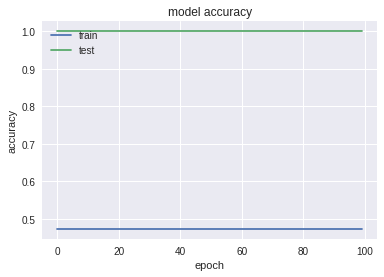

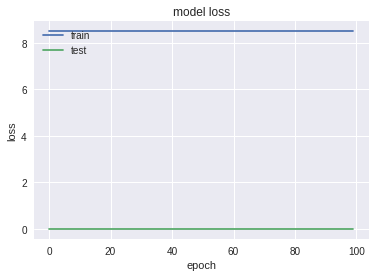

In [140]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [141]:
scores = model.evaluate(X,Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

233/233 [==============================] - 0s 148us/step

acc: 57.94%


## Split the set for training models further into a (sub-)training set and testing set.

In [142]:
print(X_train.shape)
print(X_test.shape)

(163, 26)
(70, 26)


In [ ]:
y_train.value_counts()

## Choosing parameters with GridSearchCV with 10-fold cross validations.
(Suggestion for next time: try using Bayesian model selection method)

In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

def auc_scorer(clf, X, y, model): # Helper function to plot the ROC curve
    if model=='RF':
        fpr, tpr, _ = roc_curve(y, clf.predict_proba(X)[:,1])
    elif model=='SVM':
        fpr, tpr, _ = roc_curve(y, clf.decision_function(X))
    roc_auc = auc(fpr, tpr)

    plt.figure()    # Plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve from '+model+' model (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr,roc_auc

# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

In [ ]:
tuned_parameters = [{'n_estimators':[7,8,9,10,11,12,13,14,15,16],'max_depth':[2,3,4,5,6,None],
                     'class_weight':[None,{0: 0.33,1:0.67},'balanced'],'random_state':[42]}]
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=10,scoring='f1')
clf.fit(x_train, y_train)

print("Detailed classification report:")
y_true, lr_pred = y_test, clf.predict(x_test)
print(classification_report(y_true, lr_pred))

confusion = confusion_matrix(y_test, lr_pred)
print('Confusion Matrix:')
print(confusion)

# Determine the false positive and true positive rates
fpr,tpr,roc_auc = auc_scorer(clf, x_test, y_test, 'RF')

print('Best parameters:')
print(clf.best_params_)
clf_best = clf.best_estimator_


## Examine feature importance
Since I pruned the forest (*max_depth*=2) and decrease the number of trees (*n_estimators*=8), not all features are used.

In [ ]:
plt.figure(figsize=(12,3))
features = x_test.columns.values.tolist()
importance = clf_best.feature_importances_.tolist()
feature_series = pd.Series(data=importance,index=features)
feature_series.plot.bar()
plt.title('Feature Importance')

In [ ]:
list_to_fill = x_test.columns[feature_series>0.03]
print(list_to_fill)

##### Building a Deep Learning model

In [145]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras import regularizers
BATCH_SIZE = 40
EPOCHS = 50
LEARNING_RATE = 0.001
DATASET_SIZE = 400
model = Sequential()
print(x_test.columns[feature_series>0.03].shape[0])
model.add(Dense(100,input_dim=x_test.columns[feature_series>0.03].shape[0],activation='relu'))
model.add(BatchNormalization())
model.add(Dense(50,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(25,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))
model.add(BatchNormalization())

model.add(Dense(1))

adam = optimizers.adam(lr=LEARNING_RATE)
model.compile(loss='mse', optimizer=adam, metrics=['mae'])
print('Dataset size: %s' % DATASET_SIZE)
print('Epochs: %s' % EPOCHS)
print('Learning rate: %s' % LEARNING_RATE)
print('Batch size: %s' % BATCH_SIZE)
print('Input dimension: %s' % x_test.shape[1])
print('Features used: %s' % x_test.columns[feature_series>0.03])

10
Dataset size: 400
Epochs: 50
Learning rate: 0.001
Batch size: 40
Input dimension: 24
Features used: Index(['age', 'sg', 'al', 'bu', 'sc', 'sod', 'hemo', 'pcv', 'rc', 'dm'], dtype='object')


## Next, I examine the rest of the dataset (with missing values across the rows)
Are there correlations between occurence of missing values in a row? The plot suggests, seems no.

In [146]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_195 (Dense)            (None, 100)               1100      
_________________________________________________________________
batch_normalization_37 (Batc (None, 100)               400       
_________________________________________________________________
dense_196 (Dense)            (None, 50)                5050      
_________________________________________________________________
batch_normalization_38 (Batc (None, 50)                200       
_________________________________________________________________
dense_197 (Dense)            (None, 25)                1275      
_________________________________________________________________
batch_normalization_39 (Batc (None, 25)                100       
_________________________________________________________________
dense_198 (Dense)            (None, 1)                 26        
__________

## Make predictions with the best model selected above
I filled in all NaN with 0 and pass it to the trained classifier. The results are as follows:
- True positive = 180
- True negative = 35
- False positive = 0
- False negative = 27
----
- Accuracy = 88.8%
- ROC AUC = 99.2%

In [147]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder
import time
from keras import metrics
max_len = 24
def get_cnn_model_v1():   
    model = Sequential()
    # we start off with an efficient embedding layer which maps
    # our vocab indices into embedding_dims dimensions
    # 1000 is num_max
    model.add(Embedding(400,
                        20,
                        input_length=max_len))
    model.add(Dropout(0.2))
    model.add(Conv1D(64,
                     3,
                     padding='valid',
                     activation='relu',
                     strides=1))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256))
    model.add(Dropout(0.2))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.summary()
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc',metrics.binary_accuracy])
    return model


def check_model(model,x_train,y_train):
    model.fit(X,y,batch_size=40,epochs=10,verbose=1,validation_split=0.5)

m = get_cnn_model_v1()
check_model(m,x_train, y_train)
 


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 24, 20)            8000      
_________________________________________________________________
dropout_23 (Dropout)         (None, 24, 20)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 22, 64)            3904      
_________________________________________________________________
global_max_pooling1d_11 (Glo (None, 64)                0         
_________________________________________________________________
dense_200 (Dense)            (None, 256)               16640     
_________________________________________________________________
dropout_24 (Dropout)         (None, 256)               0         
_________________________________________________________________
activation_21 (Activation)   (None, 256)               0         
__________

ValueError: Error when checking input: expected embedding_11_input to have shape (24,) but got array with shape (26,)